In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df_TelecomData = pd.read_csv(r'C:\Users\Keara\Downloads\Data Mining\TelecomChurnAnalysis\Telecom-Customer-Churn.csv')

In [3]:
df_TelecomData.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df_TelecomData.shape


(7032, 21)

In [4]:
pd.to_numeric(df_TelecomData.TotalCharges,errors='coerce').isnull()
df_TelecomData[pd.to_numeric(df_TelecomData.TotalCharges,errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [5]:
#Remove rows with space in TotalCharges
df_TelecomData = df_TelecomData[df_TelecomData.TotalCharges!=' ']
df_TelecomData.shape

(7032, 21)

In [7]:
df_TelecomData.TotalCharges = pd.to_numeric(df_TelecomData.TotalCharges)

In [8]:
df_TelecomData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [9]:
df_cluster = df_TelecomData #change to a different dataframe

In [ ]:
df_cluster.drop('county_name',axis='columns', inplace=True)

In [11]:
df_cluster.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df_cluster.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')
print_unique_col_values(df_cluster)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
cat_vars = list(df_cluster.loc[:,df_cluster.dtypes=='object'].columns)
len(cat_vars)

16

In [23]:
df_cluster[cat_vars].isnull().sum()

gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

In [28]:
num_vars=list(df_cluster.loc[:,df_cluster.dtypes!='object'].columns)
len(num_vars)

4

In [29]:
print(num_vars)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [33]:
#standardization
myscaler = StandardScaler()
myscaler = myscaler.fit(df_cluster[num_vars])
df_cluster[num_vars] = myscaler.transform(df_cluster[num_vars])

In [34]:
df_cluster[num_vars]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.440327,-1.280248,-1.161694,-0.994194
1,-0.440327,0.064303,-0.260878,-0.173740
2,-0.440327,-1.239504,-0.363923,-0.959649
3,-0.440327,0.512486,-0.747850,-0.195248
4,-0.440327,-1.239504,0.196178,-0.940457
...,...,...,...,...
7038,-0.440327,-0.343137,0.664868,-0.129180
7039,-0.440327,1.612573,1.276493,2.241056
7040,-0.440327,-0.872808,-1.170004,-0.854514
7041,2.271039,-1.158016,0.319168,-0.872095


In [36]:
#prepare the data for clustering
#encoding
df_cluster = pd.get_dummies(df_cluster, prefix=cat_vars)

In [37]:
df_cluster.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,-0.440327,-1.280248,-1.161694,-0.994194,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,-0.440327,0.064303,-0.260878,-0.173740,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,-0.440327,-1.239504,-0.363923,-0.959649,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,-0.440327,0.512486,-0.747850,-0.195248,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,-0.440327,-1.239504,0.196178,-0.940457,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
5,-0.440327,-0.995040,1.158489,-0.645369,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
6,-0.440327,-0.424625,0.807802,-0.147313,0,1,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
7,-0.440327,-0.913552,-1.165018,-0.874169,1,0,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0
8,-0.440327,-0.180161,1.329677,0.336516,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
9,-0.440327,1.205134,-0.287470,0.531476,0,1,1,0,0,1,...,1,0,1,0,1,0,0,0,1,0


In [38]:
df_cluster.shape

(7032, 47)

In [39]:
n_clust = 5

kmeans = KMeans(n_clusters=n_clust, max_iter = 20, init = 'random', 
                n_init = 10, verbose=1) #k-means object is created

In [40]:
df_cluster.drop('Churn_No',axis='columns', inplace=True)
df_cluster.drop('Churn_Yes',axis='columns', inplace=True)

In [41]:
df_cluster.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.161694,-0.994194,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,-0.440327,0.064303,-0.260878,-0.173740,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,-0.440327,-1.239504,-0.363923,-0.959649,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,-0.440327,0.512486,-0.747850,-0.195248,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,-0.440327,-1.239504,0.196178,-0.940457,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [42]:
df_cluster.shape

(7032, 45)

In [43]:
kmeans.fit(df_cluster)

Initialization complete
Iteration 0, inertia 107038.26763091338
Iteration 1, inertia 54837.67579062662
Iteration 2, inertia 51055.108689353
Iteration 3, inertia 50458.303617104095
Iteration 4, inertia 50054.472163136124
Iteration 5, inertia 49781.91409098547
Iteration 6, inertia 49551.300373330865
Iteration 7, inertia 49341.88533031176
Iteration 8, inertia 49221.73670818277
Iteration 9, inertia 49153.26189479873
Iteration 10, inertia 49097.35826639484
Iteration 11, inertia 49054.32545879611
Iteration 12, inertia 49014.83031793476
Iteration 13, inertia 48952.47545025161
Iteration 14, inertia 48801.5387658581
Iteration 15, inertia 48365.118489071545
Iteration 16, inertia 48007.870873587664
Iteration 17, inertia 47995.116899593544
Iteration 18, inertia 47992.351519317555
Iteration 19, inertia 47991.91598330709
Initialization complete
Iteration 0, inertia 107801.99968750899
Iteration 1, inertia 62002.4482191726
Iteration 2, inertia 55380.28721513062
Iteration 3, inertia 53740.873384429164


KMeans(init='random', max_iter=20, n_clusters=5, verbose=1)

In [44]:
mycenters = kmeans.cluster_centers_ #display the centroids obtained after clustering
print(mycenters)

[[ 2.27103902e+00 -2.36633901e-01  4.84179250e-01 -4.10934631e-02
   4.98364231e-01  5.01635769e-01  5.51799346e-01  4.48200654e-01
   9.33478735e-01  6.65212650e-02  1.05779716e-01  8.94220284e-01
   3.46782988e-01  1.05779716e-01  5.47437296e-01  2.42093784e-01
   7.57906216e-01 -3.88578059e-16  8.08069793e-01 -3.88578059e-16
   1.91930207e-01  6.34678299e-01 -3.88578059e-16  3.65321701e-01
   6.48854962e-01 -3.88578059e-16  3.51145038e-01  8.44056707e-01
  -3.88578059e-16  1.55943293e-01  5.35441658e-01 -3.88578059e-16
   4.64558342e-01  5.11450382e-01 -3.88578059e-16  4.88549618e-01
   8.49509269e-01  1.19956379e-01  3.05343511e-02  2.08287895e-01
   7.91712105e-01  1.69029444e-01  1.54852781e-01  5.96510360e-01
   7.96074155e-02]
 [-4.40327089e-01 -6.88149098e-01  6.55881857e-01 -4.14406949e-01
   5.01430615e-01  4.98569385e-01  6.80257511e-01  3.19742489e-01
   8.09012876e-01  1.90987124e-01 -1.38777878e-17  1.00000000e+00
   5.25035765e-01 -1.38777878e-17  4.74964235e-01  2.6466

In [46]:
labels = kmeans.fit_predict(df_cluster) #cluster labels for plotting 

Initialization complete
Iteration 0, inertia 108177.9062286588
Iteration 1, inertia 59028.41158254355
Iteration 2, inertia 54363.57062673365
Iteration 3, inertia 51120.790980180966
Iteration 4, inertia 50815.174849644805
Iteration 5, inertia 50254.81498022563
Iteration 6, inertia 49700.80377532935
Iteration 7, inertia 49405.365818086706
Iteration 8, inertia 49262.0862368789
Iteration 9, inertia 49179.459442658546
Iteration 10, inertia 49122.00480580757
Iteration 11, inertia 49095.44258675961
Iteration 12, inertia 49073.640107235595
Iteration 13, inertia 49050.817701213404
Iteration 14, inertia 49028.400522663855
Iteration 15, inertia 48993.89464690406
Iteration 16, inertia 48912.601539687756
Iteration 17, inertia 48700.628460672895
Iteration 18, inertia 48180.90616422363
Iteration 19, inertia 48002.64410345395
Initialization complete
Iteration 0, inertia 105457.01103340556
Iteration 1, inertia 60826.485210621
Iteration 2, inertia 55172.41628750898
Iteration 3, inertia 51616.40758236603

In [48]:
my_silhouette = silhouette_score(df_cluster, labels, metric='euclidean')

print(my_silhouette)

0.19706639372533755


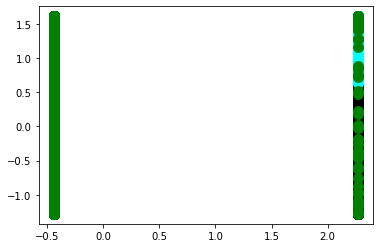

In [50]:
#show the data points and their cluster labels on the first two features
plt.scatter(df_cluster.iloc[labels ==0,0], df_cluster.iloc[labels == 0,1], s=100, c='red')
plt.scatter(df_cluster.iloc[labels ==1,0], df_cluster.iloc[labels == 1,1], s=100, c='black')
plt.scatter(df_cluster.iloc[labels ==2,0], df_cluster.iloc[labels == 2,1], s=100, c='blue')
plt.scatter(df_cluster.iloc[labels ==3,0], df_cluster.iloc[labels == 3,1], s=100, c='cyan')
plt.scatter(df_cluster.iloc[labels ==4,0], df_cluster.iloc[labels == 4,1], s=100, c='green')

In [ ]:
a